# Kernel PCA

## Importing the libraries

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [10]:
dataset = pd.read_csv("Data/Wine.csv")
display(dataset.head(), dataset.shape)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


(178, 14)

In [11]:
X = dataset.iloc[:, 0:-1].values
y = dataset.iloc[:, -1].values

## Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Feature Scaling

In [13]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Applying Kernel PCA

### Finding the optimal number of components

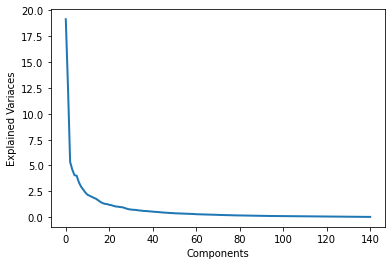

In [14]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(kernel = 'rbf').fit(X_train)
plt.plot(pca.eigenvalues_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

cant get a good view lets zoom in a little

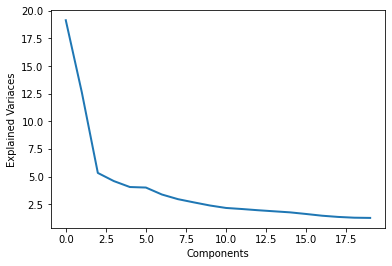

In [15]:
from sklearn.decomposition import KernelPCA

pca = KernelPCA(n_components = 20, kernel = 'rbf').fit(X_train)
plt.plot(pca.eigenvalues_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variaces')
plt.show()

Seems like as with PCA the optimal number can be 2, lets do this for visualisatin purposes

### Get the components

In [17]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

## Training the Logistic Regression model on the Training set

In [18]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

## Evaluation the Model

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, precision_recall_fscore_support
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix")
print(cm)
print()
ac = accuracy_score(y_test, y_pred)
print("accuracy Score -> ",ac)
print('Precision -> ', precision_recall_fscore_support(y_test, y_pred, average=None)[0][0])
print('Recall -> ', precision_recall_fscore_support(y_test, y_pred, average=None)[1][0])
print('F1 score -> ', precision_recall_fscore_support(y_test, y_pred, average=None)[2][0])

Confusion Matrix
[[14  0  0]
 [ 0 16  0]
 [ 0  0  6]]

accuracy Score ->  1.0
Precision ->  1.0
Recall ->  1.0
F1 score ->  1.0


## Visualising the results

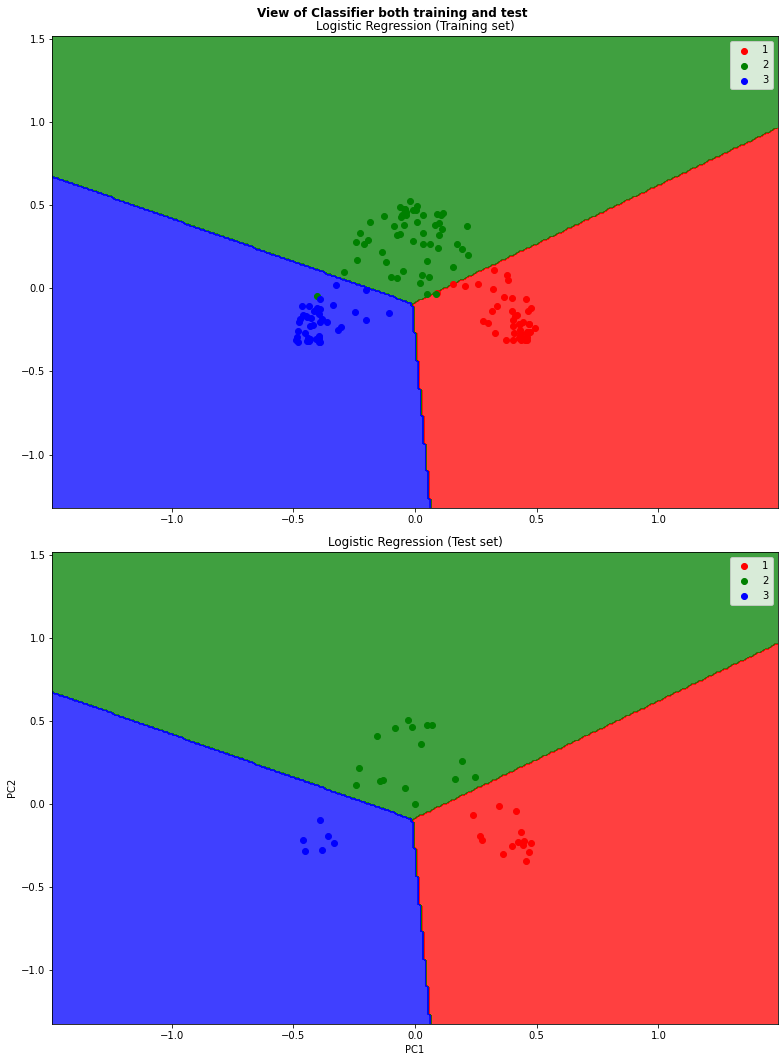

In [21]:
from matplotlib.colors import ListedColormap

fig = plt.figure(figsize=(11, 15))
ax = fig.subplots(nrows=2, ncols=1)


X_set1, y_set1 = X_train, y_train
X_set2, y_set2 = X_test, y_test

X1, X2 = np.meshgrid(np.arange(start = X_set1[:, 0].min() - 1, stop = X_set1[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set1[:, 1].min() - 1, stop = X_set1[:, 1].max() + 1, step = 0.01))

ax[0].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

ax[1].contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green', 'blue')))

ax[0].set_xlim(X1.min(), X1.max())
ax[0].set_ylim(X2.min(), X2.max())
ax[1].set_xlim(X1.min(), X1.max())
ax[1].set_ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set1)):
    ax[0].scatter(X_set1[y_set1 == j, 0], X_set1[y_set1 == j, 1], c = [ListedColormap(('red', 'green', 'blue'))(i)], label = j)
    
for i, j in enumerate(np.unique(y_set2)):
    ax[1].scatter(X_set2[y_set2 == j, 0], X_set2[y_set2 == j, 1], c = [ListedColormap(('red', 'green', 'blue'))(i)], label = j)
    
plt.suptitle('View of Classifier both training and test', fontweight='bold')

ax[0].set_title('Logistic Regression (Training set)')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[0].legend()

ax[1].set_title('Logistic Regression (Test set)')
ax[1].set_xlabel('PC1')
ax[1].set_ylabel('PC2')
ax[1].legend()

plt.tight_layout()

plt.show()